# Heart Disease Prediction



This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Attribute Information:

1. age
2. sex (Male/Female)
3. CP - Chest pain type (4 values)
4. trestbps - Resting blood pressure
5. Chol - serum cholestoral in mg/dl
6. FBS - Fasting blood sugar > 120 mg/dl
7. RestECG - Resting Electrocardiographic results (values 0,1,2)
8. thalach - Maximum heart rate achieved
9. exang - Exercise induced angina
10. oldpeak - ST depression induced by exercise relative to rest
11. Slope - The slope of the peak exercise ST segment
12. CA - Number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

We are supposed to use these attributes to predict if a person has a heart disease or not.

# Step 1: Importing Libraries

In [1]:
# Data analysis tools
import pandas as pd
import numpy as np

# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-Processing Libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

# For Train-Test Split
from sklearn.model_selection import train_test_split

# Libraries for various Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier,XGBRegressor
from sklearn.tree import DecisionTreeClassifier

# Metrics Tools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
import numpy.random as nr

#For Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve ,roc_auc_score, auc
print('Done')

Done


# Step 2: Loading the Dataset

In [2]:
df = pd.read_csv('Heart Disease.csv')

In [3]:
context_display=pd.set_option("display.max_rows", None, "display.max_columns", None)
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Step 3: Understanding the Structure of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Step 4: Data Pre-Processing

   # a) Treating Missing Values

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<b> No Missing Values in the dataset. Hence no treatment for missing values required</b>


# b) Finding and removing all the duplicated values

In [6]:
len(df[df.duplicated()])

1

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [8]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


<b> The dataset has only 1 duplicate value. Hence, we dont need to treat this as well.</b>

In [9]:
# Listing all columns in dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
# Identifying the number of unique values in each column
for label in df.columns:
    print(label,':',len(df[label].unique()))

age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2


# c) Checking for Class Imbalance

<b>From the graph, it is clear that the class distribution is almost balanced. Hence, we wont have any issues with imbalance.</b>

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Checking imbalance')

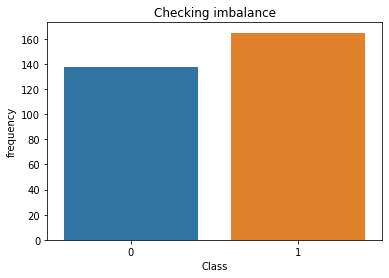

In [11]:
sns.countplot(df["target"])
plt.xlabel("Class")
plt.ylabel("frequency")
plt.title("Checking imbalance")

# d) Checking Skewness of data

<b>Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. If there is too much skewness in the data, then the statistical model don’t work properly. This is because, in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance. Hence, we need to check for outliers.</b>

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


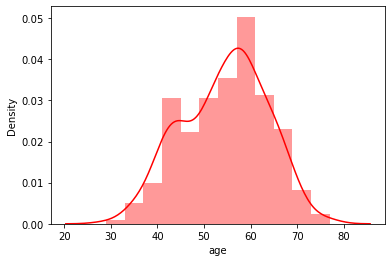

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


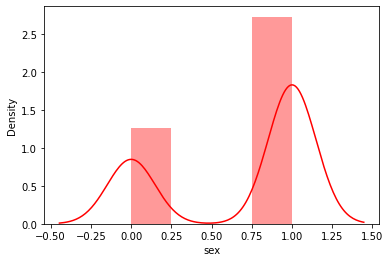

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


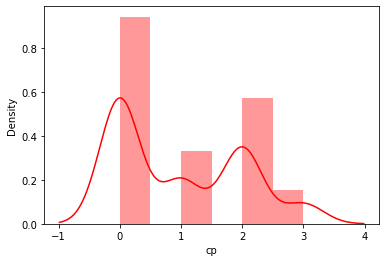

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


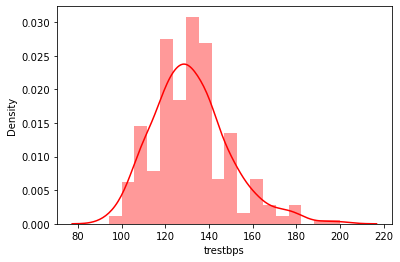

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


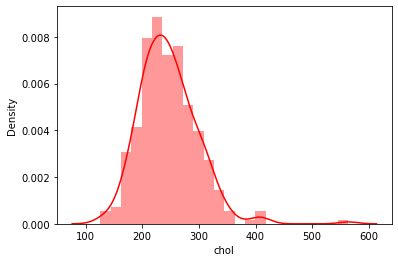

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


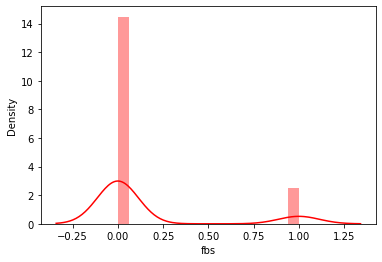

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


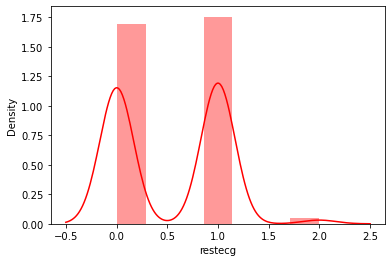

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


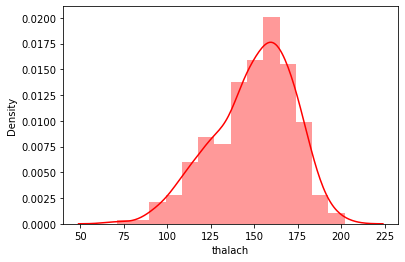

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


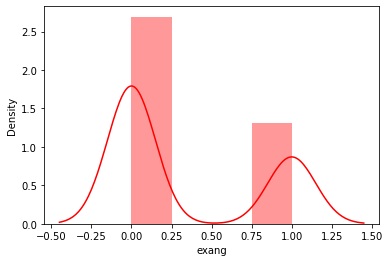

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


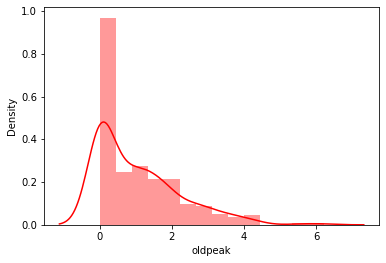

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


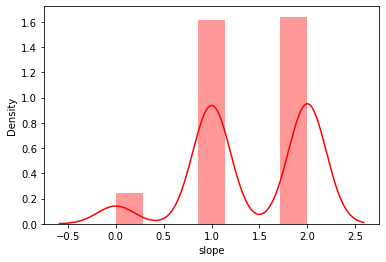

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


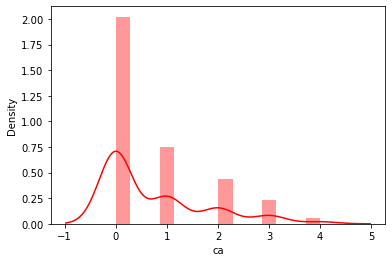

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


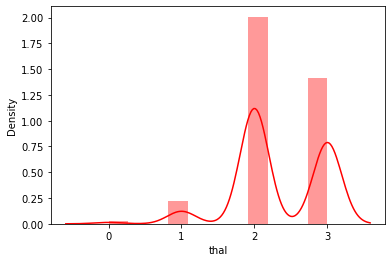

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


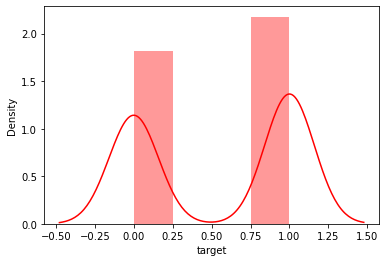

In [12]:
for col in df.columns:
    sns.distplot(df[col],kde =True, color = "red")
    plt.show()

In [13]:
for col in df.columns:
    skew= df[col].skew()
    print(col,"   ",skew)
    

age     -0.2024633654856539
sex     -0.791335191480832
cp     0.48473236883889675
trestbps     0.7137684379181465
chol     1.1434008206693387
fbs     1.986651930914452
restecg     0.16252224492761935
thalach     -0.5374096526832253
exang     0.7425315444212832
oldpeak     1.269719930601997
slope     -0.5083156098165442
ca     1.3104221354767875
thal     -0.47672219490975737
target     -0.17982105403495655


Dataset is very less skewed.
# e) Identifying Outliers with Interquartile Range (IQR) and Boxplot Visualization

<b>Outliers are observations that are significantly different from other data points. Outliers can adversely affect the training process of a machine learning algorithm, resulting in very low accuracy.

Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training time, less accurate models and ultimately poorer results.

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR =(1.5* Q3) − (1.5*Q1).</b>

In [14]:
#Printing interquartile range (IQR) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = (1.5*Q3) - (1.5*Q1)
print(IQR)


age         20.25
sex          1.50
cp           3.00
trestbps    30.00
chol        95.25
fbs          0.00
restecg      1.50
thalach     48.75
exang        1.50
oldpeak      2.40
slope        1.50
ca           1.50
thal         1.50
target       1.50
dtype: float64


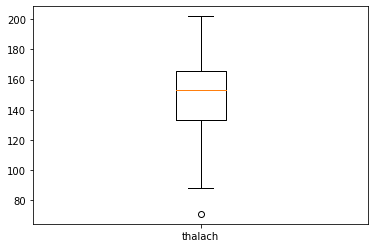

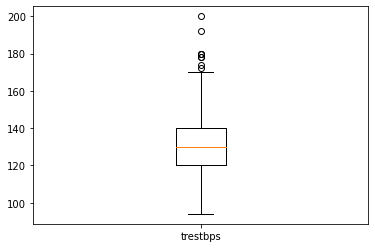

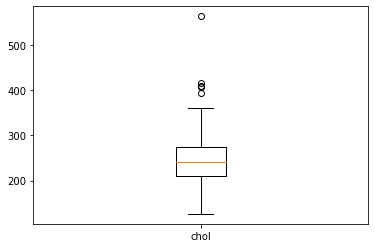

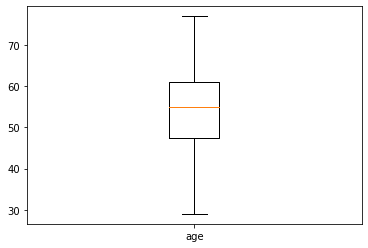

In [15]:
# Boxplot visualization for columns with high IQR

plt.boxplot([df["thalach"]])
plt.xticks([1],["thalach"])
plt.show()
plt.boxplot([df["trestbps"]])
plt.xticks([1],["trestbps"])
plt.show()
plt.boxplot([df["chol"]])
plt.xticks([1],["chol"])
plt.show()
plt.boxplot([df["age"]])
plt.xticks([1],["age"])
plt.show()

<b>Here we can see that there are outliers in the trestbps and chol columns in the dataset. There are two options here:
    
    
1) We can drop the entire column from the dataset

2) We can treat the outliers

The best option is to treat the outliers rather than removing the entire column. This way we will not lose more data.

I am using Capping method in order to treat the outliers</b>

In [16]:
# Identifying the Ideal min and maximum value

print(df['trestbps'].quantile(0.10))
print(df['trestbps'].quantile(0.90))

print(df['chol'].quantile(0.10))
print(df['chol'].quantile(0.90))

110.0
152.0
188.0
308.8


In [17]:
# Capping and Flooring of Outliers

df["trestbps"] = np.where(df["trestbps"] <110.0, 110.0,df['trestbps'])
df["trestbps"] = np.where(df["trestbps"] >152.0, 152.0,df['trestbps'])

df["chol"] = np.where(df["chol"] <188.0, 188.0,df['chol'])
df["chol"] = np.where(df["chol"] >308.8, 308.8,df['chol'])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120.0,308.8,0,1,163,1,0.6,2,0,2,1


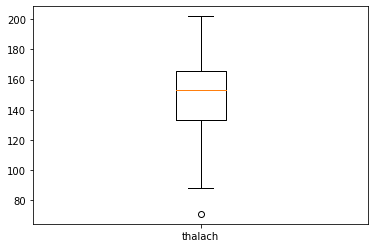

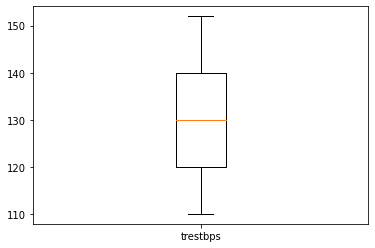

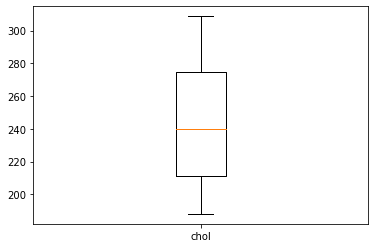

In [18]:
# Boxplot visualization after treating outliers

plt.boxplot([df["thalach"]])
plt.xticks([1],["thalach"])
plt.show()
plt.boxplot([df["trestbps"]])
plt.xticks([1],["trestbps"])
plt.show()
plt.boxplot([df["chol"]])
plt.xticks([1],["chol"])
plt.show()

# Step 5: Data Visualization

# Correlation between each predictor and the target variable. 
<b>This can be done using the corr() method and we can visualize using seabors plotting method heatmap().</b>

In [19]:
# Correlation 
df.corr()["target"]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.114370
chol       -0.121861
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

<AxesSubplot:>

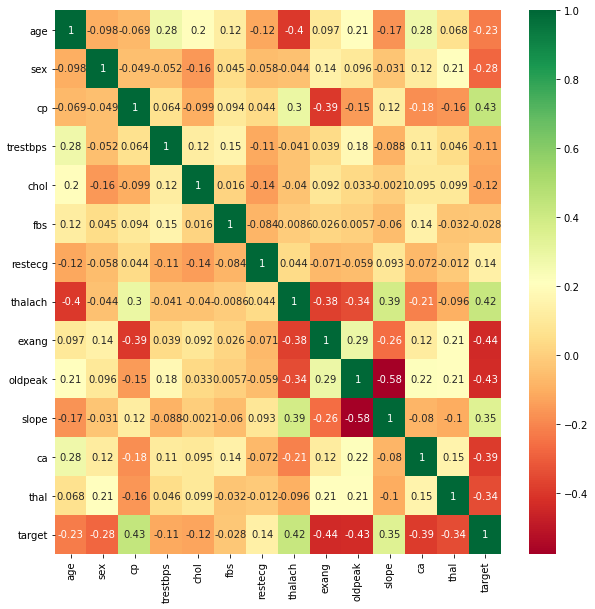

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = "RdYlGn", annot = True)

In [21]:
df.drop('target', axis=1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.114370
chol       -0.121861
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

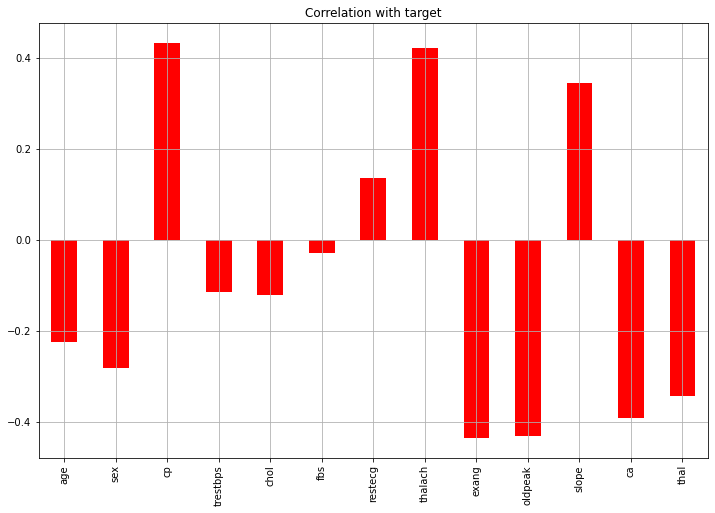

In [22]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8),title="Correlation with target",color="red")

<b>fbs is the lowest correlated variable with the target variable. All other variables have a significant correlation with the target variable.</b>


# Independent Variables vs Target Variable

<AxesSubplot:xlabel='target'>

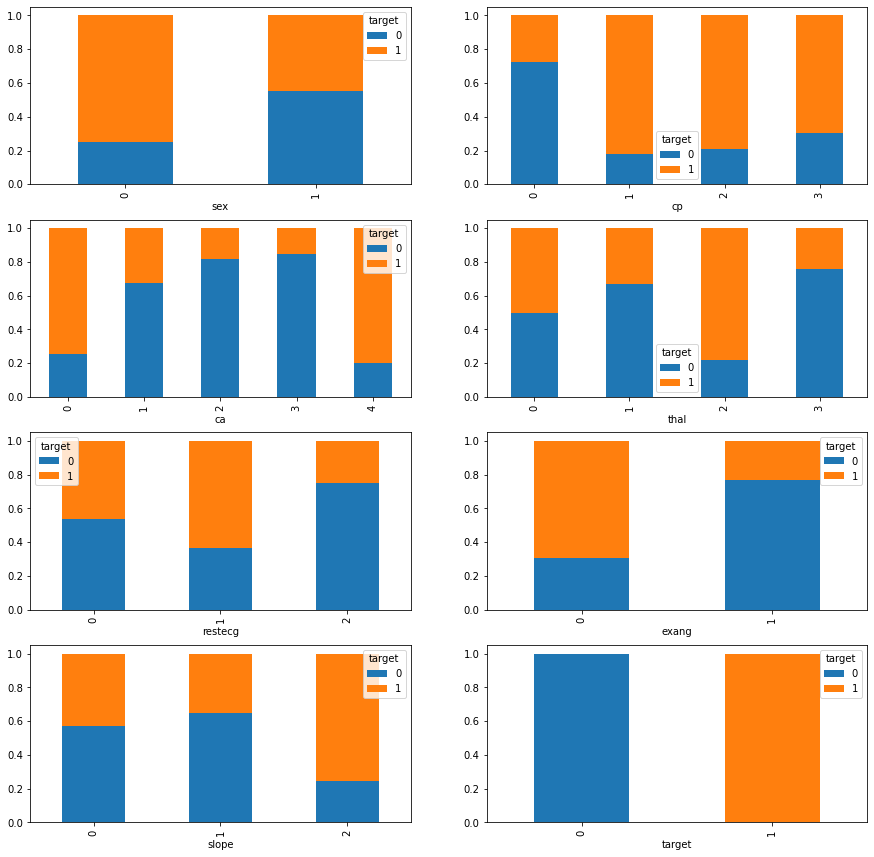

In [23]:
fig, ax = plt.subplots(4,2,figsize = (15,15))

# sex vs target
sex = pd.crosstab(df['sex'],df['target'])
sex.div(sex.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,0])

# cp vs target
cp = pd.crosstab(df['cp'],df['target'])
cp.div(cp.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

# ca vs target
ca= pd.crosstab(df['ca'],df['target'])
ca.div(ca.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,0])

# thal vs target
thal= pd.crosstab(df['thal'],df['target'])
thal.div(thal.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,1])

# restecg vs target
restecg= pd.crosstab(df['restecg'],df['target'])
restecg.div(restecg.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[2,0])

# exang vs target
exang= pd.crosstab(df['exang'],df['target'])
exang.div(exang.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[2,1])

# slope vs target
slope= pd.crosstab(df['slope'],df['target'])
slope.div(slope.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[3,0])

# # target vs age
# target= pd.crosstab(df['age'],df['target'])
# target.div(target.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[4,0])

# # target vs thalache
# target= pd.crosstab(df['thalach'],df['target'])
# target.div(target.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[4,1])


# target vs target
target= pd.crosstab(df['target'],df['target'])
target.div(target.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[3,1])

# age vs Maximum Heart Rate for Heart Diseases

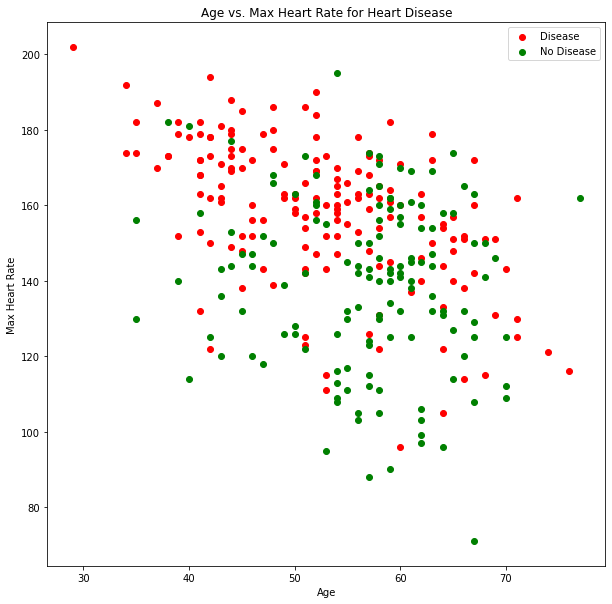

In [24]:
# Age vs. Max Heart Rate for Heart Disease

plt.figure(figsize=(10, 10))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="Red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="Green")

# Add some helpful info
plt.title("Age vs. Max Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);


# Step 6: Defining the Tatget and Predictor Variables and Standard Scaling

<b> If a feature’s variance is more than the variance of other features, that particular feature might dominate other features in the dataset. This could affect the accuracy of predictions. Hence, we need to scale all the features to a standard centred scale. For this purpose, we use StandardScaler() method.</b>

In [25]:
import numpy.random as nr

nr.seed(7)

for i in range(0,10):
    n = nr.randint(1,11)
    print(n)


5
10
7
4
4
8
8
10
8
9


In [26]:
scaler=StandardScaler()

In [27]:
X=df.drop(["target"],axis=1)
y=df["target"]

X =scaler.fit_transform(X)

In [28]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [29]:
print(y_train.head())

74     1
153    1
64     1
296    0
287    0
Name: target, dtype: int64


In [30]:
print(len(y_test))

61


In [31]:
print(y_train.value_counts())

1    131
0    111
Name: target, dtype: int64


In [32]:
print(y_test.value_counts())

1    34
0    27
Name: target, dtype: int64


In [33]:
print(y_train.value_counts()/len(y_train))

1    0.541322
0    0.458678
Name: target, dtype: float64


In [34]:
print(y_test.value_counts()/len(y_test))

1    0.557377
0    0.442623
Name: target, dtype: float64


# Step 7: Fitting the dataset to various models

<b>We will fit the dataset to various models and find out the best fit model among these.

Various models used in this notebook are:
    

1)  Logistic Regression

2)  KNN                

3)  Naive-Bayes       

4)  SVM                   

5)  Decision Tree         

6)  Gradient Boosting     

7)  Random Forest         

8)  AdaBoost             

9)  XGBoost    

</b>           

# 1) Logistic Regression

In [35]:
#Fitting the model

logistic_Regression = LogisticRegression(random_state=1,solver = "lbfgs",C=10)
logistic_Regression.fit(x_train,y_train)

LogisticRegression(C=10, random_state=1)

In [36]:
# Applying the model to the x_test

y_pred = logistic_Regression.predict(x_test)

print(pd.Series(y_test).value_counts())
print(pd.Series(y_pred).value_counts())

1    34
0    27
Name: target, dtype: int64
1    37
0    24
dtype: int64


In [37]:
# Finding Accuracy

log = accuracy_score(y_test, y_pred)*100
log

85.24590163934425

In [38]:
# Confusion Matrix

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[21  6]
 [ 3 31]]


In [39]:
tp , fn , fp , tn = confusion_matrix(y_test,y_pred).ravel()
print("TP:",tn,'FN:',fp ,'FP:', fn ,'TN:' ,tp )


TP: 21 FN: 6 FP: 3 TN: 31


In [40]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score
# sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
# sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [41]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score


import sklearn.metrics as sklm
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, y_pred)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive        21                 6
Actual negative         3                31

Accuracy  0.85
 
           Positive      Negative
Num case       27            34
Precision    0.88          0.84
Recall       0.78          0.91
F1           0.82          0.87


In [42]:
print('Negative')
TP=31
FN=3
FP=6
TN=21
Recall=TP/(TP+FN)
Precision=TP/(TP+FP)
print('Recall:',Recall,'Precision:',Precision)

Negative
Recall: 0.9117647058823529 Precision: 0.8378378378378378


In [43]:
print('positive')
TP=21
FP=3
FN=6
TN=31
Recall=TP/(TP+FN)
Precision=TP/(TP+FP)
print('Recall:',Recall,'Precision:',Precision)

positive
Recall: 0.7777777777777778 Precision: 0.875


In [44]:
import sklearn
sklearn.metrics.precision_score(y_test,y_pred)

0.8378378378378378

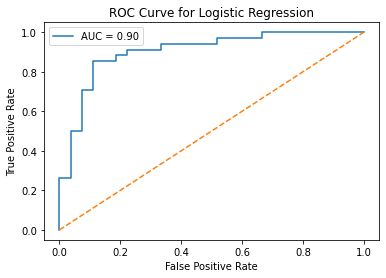

In [45]:
# Plotting the ROC Curve

prob_lr=logistic_Regression.predict_proba(x_test)
auc_lr = roc_auc_score(y_test,prob_lr[:,1])
fprlr,tprlr,_ = roc_curve(y_test,prob_lr[:,1])
roc_auc=auc(fprlr,tprlr)
plt.plot(fprlr,tprlr,label = "AUC = %.2f" % auc_lr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 2) KNN

In [46]:
#Fitting the model

knn = KNeighborsClassifier(weights= 'distance', p= 1, n_neighbors= 25, algorithm= 'brute')
knn.fit(x_train,y_train)
#TRAIN(Indepandant 70% splited train data,Depandant 70% splited train data) ---> given in for training the model  

KNeighborsClassifier(algorithm='brute', n_neighbors=25, p=1, weights='distance')

In [47]:
# Applying the model to the x_test

pred_knn = knn.predict(x_test)
     # PREDICT(Independant 30% of splited test data)   -----> gives model predicted dependant values(y)
pred_knn
#for train data predict:
pred_knn_train = knn.predict(x_train)
pred_knn_train

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [48]:
# Finding Accuracy

KNN = accuracy_score(y_test, pred_knn)*100
   #ACCURACY(Dependant 30% of splitted test data, model predicted data for 30% train data)--> gives how much the value is 
                                                                                           #accurate from the actual test values
KNN

85.24590163934425

In [49]:
error=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    error.append(np.mean(pred1!=y_test))
print(error)

[0.18032786885245902, 0.19672131147540983, 0.14754098360655737, 0.14754098360655737, 0.18032786885245902, 0.16393442622950818, 0.18032786885245902, 0.16393442622950818, 0.13114754098360656, 0.09836065573770492, 0.14754098360655737, 0.13114754098360656, 0.14754098360655737, 0.14754098360655737, 0.16393442622950818, 0.16393442622950818, 0.16393442622950818, 0.16393442622950818, 0.19672131147540983, 0.16393442622950818, 0.18032786885245902, 0.14754098360655737, 0.19672131147540983, 0.18032786885245902, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983, 0.19672131147540983]


Text(0, 0.5, 'error rate')

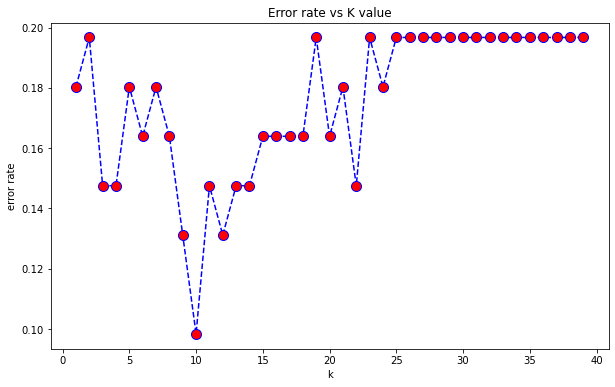

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')

In [51]:
# Confusion Matrix

cm_knn=confusion_matrix(y_test, pred_knn)
print(cm_knn)

[[20  7]
 [ 2 32]]


In [52]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [53]:
#Classification Report for train data
print(classification_report(y_train, pred_knn_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       131

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



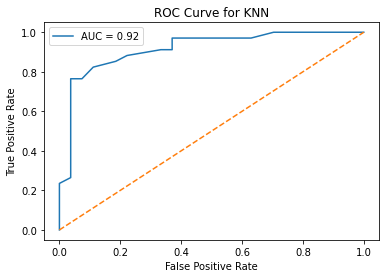

In [54]:
# Plotting the ROC Curve

prob_knn= knn.predict_proba(x_test)
auc_knn = roc_auc_score(y_test,prob_knn[:,1])
fprknn,tprknn,_= roc_curve(y_test,prob_knn[:,1])
roc_auc_knn=auc(fprknn,tprknn)
plt.plot(fprknn,tprknn,label = "AUC = %.2f" % auc_knn)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 3) Naive-Bayes

In [55]:
#Fitting the model

gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [56]:
# Applying the model to the x_test

pred_gnb = gnb.predict(x_test)
pred_gnb

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [57]:
# Finding Accuracy

GNB = accuracy_score(y_test, pred_gnb)*100

In [58]:
# Confusion Matrix

cm_gnb=confusion_matrix(y_test, pred_gnb)
print(cm_gnb)

[[20  7]
 [ 3 31]]


In [59]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_gnb))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



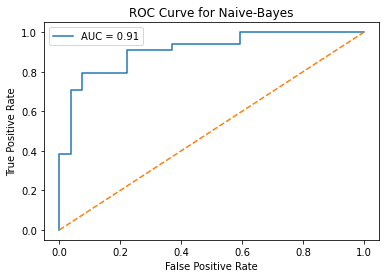

In [60]:
# Plotting the ROC Curve

prob_gnb= gnb.predict_proba(x_test)
auc_gnb = roc_auc_score(y_test,prob_gnb[:,1])
fprgnb,tprgnb,_= roc_curve(y_test,prob_gnb[:,1])
roc_auc_gnb=auc(fprgnb,tprgnb)
plt.plot(fprgnb,tprgnb,label = "AUC = %.2f" % auc_gnb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive-Bayes")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 4) SVM

In [61]:
#Fitting the model

svc = SVC(probability=True,gamma=0.9,kernel='linear', degree=4,C=72.04,random_state=0)
svc.fit(x_train,y_train)

# Applying the model to the x_test
pred_svc = svc.predict(x_test)
pred_svc

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [62]:
# Finding Accuracy

SVC = accuracy_score(y_test, pred_svc)*100

In [63]:
# Confusion Matrix

cm_svc=confusion_matrix(y_test, pred_svc)
print(cm_svc)

[[20  7]
 [ 4 30]]


In [64]:
# Classification Report that computes various 
#metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



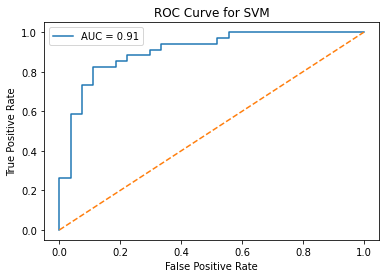

In [65]:
# Plotting the ROC Curve

prob_svc= svc.predict_proba(x_test)
auc_svc = roc_auc_score(y_test,prob_svc[:,1])
fprsvc,tprsvc,_= roc_curve(y_test,prob_svc[:,1])
roc_auc_svc=auc(fprsvc,tprsvc)
plt.plot(fprsvc,tprsvc,label = "AUC = %.2f" % auc_svc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 5) Decision Tree

In [66]:
#Fitting the model

dtree_en = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=21, min_samples_split=10, random_state=5)
clf = dtree_en.fit(x_train,y_train)

In [67]:
# Applying the model to the x_test

pred_dt = clf.predict(x_test)
pred_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [68]:
# Finding Accuracy

DTREE = accuracy_score(y_test, pred_dt)*100

In [69]:
# Confusion Matrix

cm_dt=confusion_matrix(y_test,pred_dt)
print(cm_dt)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,pred_dt))

[[23  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



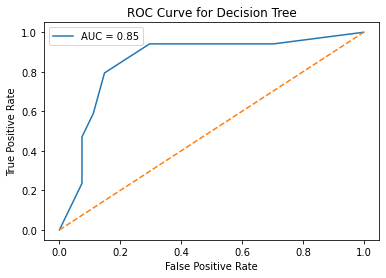

In [70]:
# Plotting the ROC Curve

prob_dt= dtree_en.predict_proba(x_test)
auc_dt = roc_auc_score(y_test,prob_dt[:,1])
fprdt,tprdt,_= roc_curve(y_test,prob_dt[:,1])
roc_auc_dt=auc(fprdt,tprdt)
plt.plot(fprdt,tprdt,label = "AUC = %.2f" % auc_dt)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 6) Gradient Boosting

In [71]:
#Fitting the model

GBC=GradientBoostingClassifier(n_estimators=70, loss='deviance', learning_rate=0.8, subsample=1.0, 
                               criterion='mae', min_samples_split=4, min_samples_leaf=13,max_depth=20, random_state=2)
GBC.fit(x_train,y_train)

C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


GradientBoostingClassifier(criterion='mae', learning_rate=0.8, max_depth=20,
                           min_samples_leaf=13, min_samples_split=4,
                           n_estimators=70, random_state=2)

In [72]:
# Applying the model to the x_test

Y_predict=GBC.predict(x_test)
Y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [73]:
# Finding Accuracy

gbc = accuracy_score(y_test,Y_predict)*100

In [74]:
# Confusion Matrix

cm_gbc=confusion_matrix(y_test,Y_predict)
print(cm_gbc)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,Y_predict))

[[24  3]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



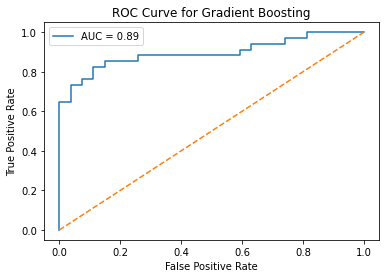

In [75]:
# Plotting the ROC Curve

prob_GBC= GBC.predict_proba(x_test)
auc_GBC = roc_auc_score(y_test,prob_GBC[:,1])
fprGBC,tprGBC,_= roc_curve(y_test,prob_GBC[:,1])
roc_auc_GBC=auc(fprGBC,tprGBC)
plt.plot(fprGBC,tprGBC,label = "AUC = %.2f" % auc_GBC)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 7) Random Forest

In [76]:
#Fitting the model

rfc = RandomForestClassifier(criterion='gini',n_estimators=70,bootstrap=True,max_depth=13,max_features='auto', min_samples_leaf=5, min_samples_split=10,random_state=1)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=70, random_state=1)

In [77]:
# Applying the model to the x_test

pred_rf= rfc.predict(x_test)
pred_rf

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [78]:
# Finding Accuracy

RFC = accuracy_score(y_test,pred_rf)*100

In [79]:
# Confusion Matrix

cm_rf=confusion_matrix(y_test, pred_rf)
print(cm_rf)

[[23  4]
 [ 5 29]]


In [80]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



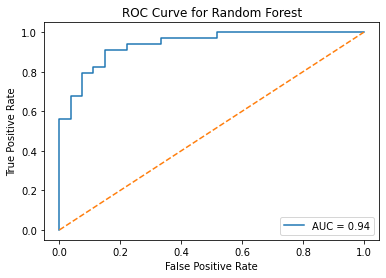

In [81]:
# Plotting the ROC Curve

prob_rfc= rfc.predict_proba(x_test)
auc_rfc = roc_auc_score(y_test,prob_rfc[:,1])
fprrfc,tprrfc,_= roc_curve(y_test,prob_rfc[:,1])
roc_auc_rfc=auc(fprrfc,tprrfc)
plt.plot(fprrfc,tprrfc,label = "AUC = %.2f" % auc_rfc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 8) AdaBoost (Entropy-Decision Tree)

In [82]:
#Fitting the model. Base model is chosen to be Decision Tree


adaboost = AdaBoostClassifier(n_estimators=450, base_estimator=None,random_state=2,learning_rate=2.0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=2.0, n_estimators=450, random_state=2)

In [83]:
# Applying the model to the x_test

pred = adaboost.predict(x_test)
pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [84]:
# Finding Accuracy

ada = accuracy_score(y_test,pred)*100

In [85]:
# Confusion Matrix

cm_ada=confusion_matrix(y_test, pred)
print(cm_ada)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred))

[[20  7]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.80      0.82      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



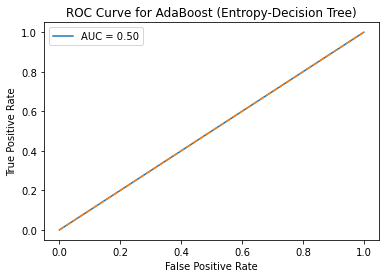

In [86]:
# Plotting the ROC Curve

prob_adaboost= adaboost.predict_proba(x_test)
auc_adaboost = roc_auc_score(y_test,prob_adaboost[:,1])
fpradaboost,tpradaboost,_= roc_curve(y_test,prob_adaboost[:,1])
roc_auc_adaboost=auc(fpradaboost,tpradaboost)
plt.plot(fpradaboost,tpradaboost,label = "AUC = %.2f" % auc_adaboost)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for AdaBoost (Entropy-Decision Tree)")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 9) XGBoost 

In [87]:
#Fitting the model

xgb =  XGBClassifier(learning_rate =0.6,n_estimators=100,max_depth=10,min_child_weight=2,booster='gblinear',
                     subsample=0.8,colsample_bytree=0.8,nthread=5,scale_pos_weight=1,seed=27)
xgb.fit(x_train, y_train)

[12:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dines\anaconda3\envs\spyder-env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.6, max_delta_step=None, max_depth=10,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=5, nthread=5, num_parallel_tree=None,
              random_state=27, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method=None, validate_parameters=1,
              verbosity=None)

In [88]:
# Applying the model to the x_test


predxg = xgb.predict(x_test)

# Finding Accuracy
xg = accuracy_score(predxg, y_test)*100


In [89]:
# Confusion Matrix

cm_xg=confusion_matrix(y_test, predxg)
print(cm_xg)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, predxg))

[[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



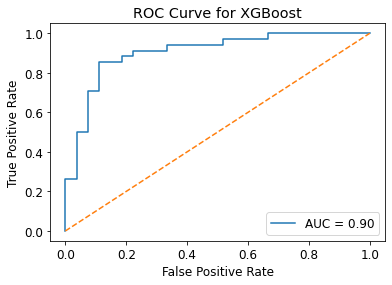

In [98]:
# Plotting the ROC Curve

prob_xgb= xgb.predict_proba(x_test)
auc_xgb = roc_auc_score(y_test,prob_xgb[:,1])
fprxgb,tprxgb,_= roc_curve(y_test,prob_xgb[:,1])
roc_auc_xgb=auc(fprxgb,tprxgb)
plt.plot(fprxgb,tprxgb,label = "AUC = %.2f" % auc_xgb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# Step 8: Choosing the Best model

There are various ways to evaluate a classification model. Some of them are:
 
1) Accuracy
    
2) AUC
    
3) ROC
    
4) f1 Score
    
5) Type I Error

I am evaluating with all these metrics in order to find the best fit model

# Confusion Matrix

A confusion matrix is an N X N matrix, where N is the number of classes being predicted. Confusion Matrix gives us a matrix as output and describes the complete performance of the model.

The correct predictions falls on the diagonal line of the matrix.

4 important terms in Confusion Matrix:

<b>True Positives</b>  : We predict YES and the actual output is also YES.

<b>True Negatives</b>  : We predict NO and the actual output is NO.

<b>False Positives(Type I Error)</b> : We predict YES but the actual output is NO.

<b>False Negatives(Type II error)</b> : We predict NO but the actual output is YES.

<b>The Confusion matrix in itself is not a performance measure, but almost all of the performance metrics are based on Confusion Matrix.


# 1) Accuracy

In [91]:
# Accuracy values for all the models
print("1)  Logistic Regression    :",round(log, 2))
print("2)  KNN                    :",round(KNN, 2))
print("3)  Naive-Bayes            :",round(GNB, 2))
print("4)  SVM                    :",round(SVC, 2))
print("5)  Decision Tree          :",round(DTREE, 2))
print("6)  Gradient Boosting      :",round(gbc, 2))
print("7)  Random Forest          :",round(RFC, 2))
print("8)  AdaBoost               :",round(ada, 2))
print("9)  XGBoost                :",round(xg, 2))

1)  Logistic Regression    : 85.25
2)  KNN                    : 85.25
3)  Naive-Bayes            : 83.61
4)  SVM                    : 81.97
5)  Decision Tree          : 81.97
6)  Gradient Boosting      : 85.25
7)  Random Forest          : 85.25
8)  AdaBoost               : 78.69
9)  XGBoost                : 85.25


1)  Random Forest          : 85.25 %

2)  XGBoost                : 85.25 %

3)  Logistic Regression    : 85.25%

4)  KNN                    : 85.25 %

5)  Gradient Boosting      : 83.61 %

6)  Naive-Bayes            : 83.61 %

7)  SVM                    : 81.97 %

8)  Decision Tree          : 81.97 %

9)  AdaBoost               : 78.69 %


Here, <b>Random Forest Classifier, XGBoost, Logistic Regression and KNN have the highest accuracy rate.</b> But, We need to choose one best model.</b>

<b>In this case, Accuracy metric cannot be taken as the best indicator of model performance. Therefore, we need to consider other metrics before deciding the best model.</b>

# 2) Area Under Curve (AUC)

In [92]:
# Area Under the Curve(AUC) of all the models
print('Area under the curve for Logistic Regression :',round(roc_auc, 2))
print('Area under the curve for KNN                 :',round(roc_auc_knn, 2))
print('Area under the curve for Naive-Bayes         :',round(roc_auc_gnb, 2))
print('Area under the curve for SVM                 :',round(roc_auc_svc, 2))
print('Area under the curve for Decision Tree       :',round(roc_auc_dt, 2))
print('Area under the curve for Gradient Boosting   :',round(roc_auc_GBC, 2))
print('Area under the curve for Random Forest       :',round(roc_auc_rfc, 2))
print('Area under the curve for AdaBoost            :',round(roc_auc_adaboost, 2))
print('Area under the curve for XGBoost             :',round(roc_auc_xgb, 2))

Area under the curve for Logistic Regression : 0.9
Area under the curve for KNN                 : 0.92
Area under the curve for Naive-Bayes         : 0.91
Area under the curve for SVM                 : 0.91
Area under the curve for Decision Tree       : 0.85
Area under the curve for Gradient Boosting   : 0.89
Area under the curve for Random Forest       : 0.94
Area under the curve for AdaBoost            : 0.5
Area under the curve for XGBoost             : 0.9


The area under the curve (AUC), is an aggregated measure of performance of a binary classifier on all possible threshold values. AUC calculates the area under the ROC curve, and therefore it is between 0 and 1.<b> For any classifier, the higher the AUC of a model the better it is.</b> The AUC values of all the models are listed below:

1)  Random Forest          : 0.94

2)  Gradient Boosting      : 0.94

3)  KNN                    : 0.92

4)  AdaBoost               : 0.89

5)  SVM                    : 0.91

6)  Naive-Bayes            : 0.91

7)  XGBoost                : 0.90

8)  Logistic Regression    : 0.90

9)  Decision Tree          : 0.85


Here, <b>Random Forest</b> and <b>Gradient Boosting</b> have the highest AUC value. 

# 3) ROC Curve

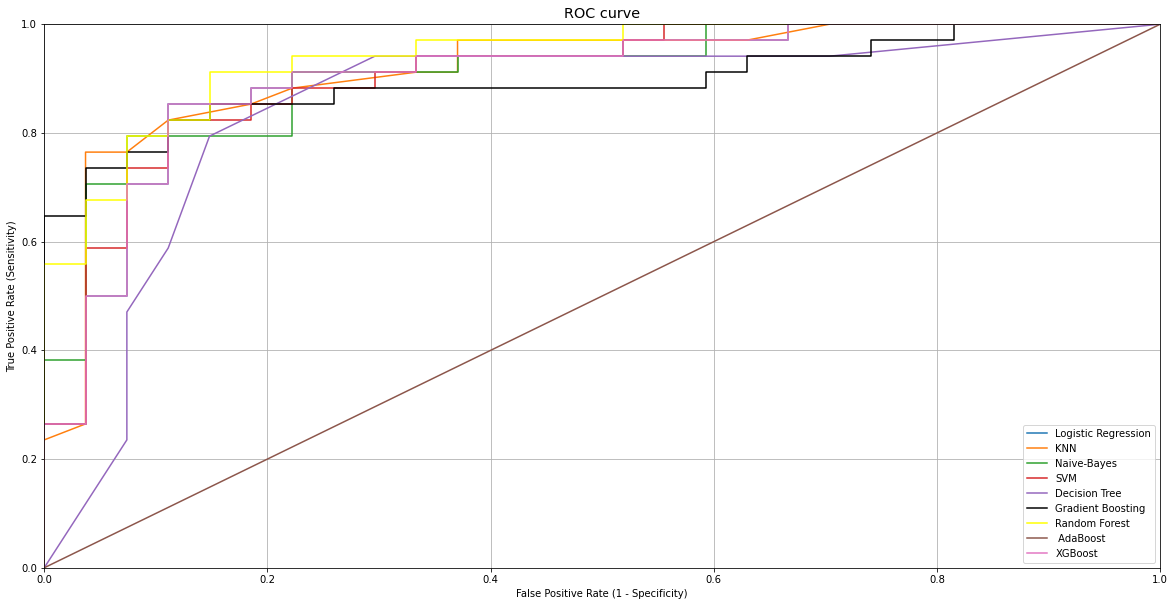

In [93]:
#ROC Curve for all models
plt.figure(figsize = (20,10))
plt.plot(fprlr,tprlr,label = "Logistic Regression")
plt.plot(fprknn,tprknn,label = "KNN")
plt.plot(fprgnb,tprgnb,label = "Naive-Bayes")
plt.plot(fprsvc,tprsvc,label = "SVM")
plt.plot(fprdt,tprdt,label = "Decision Tree")
plt.plot(fprGBC,tprGBC,label = "Gradient Boosting",color='black')
plt.plot(fprrfc,tprrfc,label = "Random Forest",color='yellow')
plt.plot(fpradaboost,tpradaboost,label = " AdaBoost")
plt.plot(fprxgb,tprxgb,label = "XGBoost")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

The <b>Receiver Operating Characteristic (ROC)</b> curve is plot which shows the performance of a binary classifier as function of its cut-off threshold. ROC curve is one of the most effective evaluation metrics because it visualizes the accuracy of predictions for a whole range of cutoff values. It essentially shows the true positive rate (TPR) against the false positive rate (FPR) for all possible threshold values. <b>A model is said to be the best model when the ROC is close to the upper left corner.</b>

Looking at the ROC curve plot above, the <b>yellow curve (Random Forest) and Black curve (Gradient Boosting), are the curves that is closest to the upper left corner. Hence, based on the ROC plot, Random Forest or Gradient Boosting are the best fit models.</b>

# 4) F1-Score

In [94]:
# f1_score of all models
print("1)  Logistic Regression    :",round(f1_score(y_pred,y_test), 2))
print("2)  KNN                    :",round(f1_score(pred_knn,y_test), 2))
print("3)  Naive-Bayes            :",round(f1_score(pred_gnb,y_test), 2))
print("4)  SVM                    :",round(f1_score(pred_svc,y_test), 2))
print("5)  Decision Tree          :",round(f1_score(pred_dt,y_test), 2))
print("6)  Gradient Boosting      :",round(f1_score(Y_predict,y_test), 2))
print("7)  Random Forest          :",round(f1_score(pred_rf,y_test), 2))
print("8)  AdaBoost               :",round(f1_score(pred,y_test), 2))
print("9)  XGBoost                :",round(f1_score(predxg,y_test), 2))

1)  Logistic Regression    : 0.87
2)  KNN                    : 0.88
3)  Naive-Bayes            : 0.86
4)  SVM                    : 0.85
5)  Decision Tree          : 0.83
6)  Gradient Boosting      : 0.86
7)  Random Forest          : 0.87
8)  AdaBoost               : 0.81
9)  XGBoost                : 0.87


<b>Precision</b>           - It is the number of True Positive divided by the number of positive results predicted by the classifier.

<b>Recall/ Sensitivity</b> - It is the number of True Positives divided by the number of all relevant samples

<b>F1 Score</b>            - F1 Score is the Harmonic Mean between precision and recall.

F1 Score tells how precise the classifier is (how many values it classifies correctly).

<b>The greater the F1 Score, the better is the performance of our model.</b>

f1_Scores for all the models are:

1)  KNN                    : 0.88

2)  XGBoost                : 0.87

3)  Random Forest          : 0.87

4)  Logistic Regression    : 0.87

5)  Gradient Boosting      : 0.85

6)  Naive-Bayes            : 0.86

7)  SVM                    : 0.85

8)  Decision Tree          : 0.83

9)  AdaBoost               : 0.81


Here, <b>KNN</b> has the highest f1_score. Hence, based on the f1_score, KNN is the best fit model.

# 5)Type I Error

In [96]:
#Accessing the False Positives of all models from their confusion Matrix
print("1)  Logistic Regression    :",cm[0][1])
print("2)  KNN                    :",cm_knn[0][1])
print("3)  Naive-Bayes            :",cm_gnb[0][1])
print("4)  SVM                    :",cm_svc[0][1])
print("5)  Decision Tree          :",cm_dt[0][1])
print("6)  Gradient Boosting      :",cm_gbc[0][1])
print("7)  Random Forest          :",cm_rf[0][1])
print("8)  AdaBoost               :",cm_ada[0][1])
print("9)  XGBoost                :",cm_xg[0][1])

1)  Logistic Regression    : 6
2)  KNN                    : 7
3)  Naive-Bayes            : 7
4)  SVM                    : 7
5)  Decision Tree          : 4
6)  Gradient Boosting      : 3
7)  Random Forest          : 4
8)  AdaBoost               : 7
9)  XGBoost                : 6


False Positives(Type I Error) occurs when we incorrectly reject a true hypothesis.<b>Lower the value of False Positives, better is the model</b>. This is because, while predicting, <b>if we predict that a person has a heart disease, but later he/she does not actually have any heart disease, then this kind of wrong prediction could further increase the risk factor to an alarming range.</b>

The False Positives(Type I Error) for all the models can be accessed from the confusion matrix. The values for various models are:

1)  Logistic Regression    : 6

2)  KNN                    : 7

3)  Naive-Bayes            : 7

4)  SVM                    : 7

5)  Decision Tree          : 4

6)  Gradient Boosting      : 3

7)  Random Forest          : 4

8)  AdaBoost               : 7

9)  XGBoost                : 6

<b>KNN algorithm has the least number of False Positives(Type I Error). Hence, based on the False Positives(Type I Error), KNN is the best fit model.</b>

# Step 9: Finalizing the Best Model

After all the comparison using 5 different metrics:

# Both <b><u>Random Forest Classifier</u></b> and <b><u>K-Nearest Neighbors (KNN)</u></b> prove to be best models for predicting if a person has a heart disease.


